## Artificial Neural Network (ANN)

Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.

#### Steps of ANN:
1. Import Libraries
    In order to show you, I import again but we actually imported them at previous parts.
2. Prepare Dataset
    Totally same with previous part(logistic regression).
    We use same dataset so we only need train_loader and test_loader.
    We use same batch size, epoch and iteration numbers.
3. Create ANN Model
    We add 3 hidden layers.
    We use ReLU, Tanh and ELU activation functions for diversity.
4. Instantiate Model Class
    input_dim = 28*28 # size of image pxpx
    output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9
    Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
    create model
5. Instantiate Loss Class
    Cross entropy loss
    It also has softmax(logistic function) in it.
6. Instantiate Optimizer Class
    SGD Optimizer
7. Traning the Model
8. Prediction
9. As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training).

In [1]:
# importing librarires
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Preparing the data set

# Prepare the dataset
traincsv=pd.read_csv("D:\\Data Science\\DeepLearning\\all\\train.csv",dtype = np.float32)

#splitting the data in to features(X) and labels(Y)

targets_numpy = traincsv.label.values
features_numpy = traincsv.loc[:,train.columns != "label"].values/255                # normalizing the data
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [4]:
# converting the numpy data frame to features and target Tensors

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [5]:
# batch size and iterations
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [6]:
# Tensor Dataset and Tensor data loader

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [7]:
class ANNModel(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        super(ANNModel,self).__init__()
        
        #linear function1  784 inputs ->100 outputs
        self.fc1=nn.Linear(input_dim,hidden_dim)
        # non-linear function 1
        self.relu1 = nn.ReLU()
        
        #linear fucntion2 100->100
        self.fc2=nn.Linear(hidden_dim,hidden_dim)
        # non-linear function 2
        self.tanh2=nn.Tanh()
        
        #linear function3 100->100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # non-linear function 3
        self.elu3=nn.ELU()
        
        #linear fucntion 4 for output 100->10
        self.fc4=nn.Linear(hidden_dim,output_dim)
        
    def forward(self,x):
        
        # linear function 1
        out= self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
    

In [8]:
# instantiate ANN
input_dim = 28*28
hidden_dim = 100 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

In [9]:
# create ANN
model = ANNModel(input_dim,hidden_dim,output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# using SGD for optimizing the loss and updating the parameters
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# ANN traing with training data set
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.8642390370368958  Accuracy: 76 %
Iteration: 1000  Loss: 0.4794046878814697  Accuracy: 87 %
Iteration: 1500  Loss: 0.24563094973564148  Accuracy: 89 %
Iteration: 2000  Loss: 0.3041223883628845  Accuracy: 90 %
Iteration: 2500  Loss: 0.32838577032089233  Accuracy: 91 %
Iteration: 3000  Loss: 0.1297874003648758  Accuracy: 92 %
Iteration: 3500  Loss: 0.2521515190601349  Accuracy: 93 %
Iteration: 4000  Loss: 0.0672285333275795  Accuracy: 93 %
Iteration: 4500  Loss: 0.35440054535865784  Accuracy: 94 %
Iteration: 5000  Loss: 0.09791462868452072  Accuracy: 94 %
Iteration: 5500  Loss: 0.19028404355049133  Accuracy: 94 %
Iteration: 6000  Loss: 0.19770461320877075  Accuracy: 94 %
Iteration: 6500  Loss: 0.10331998765468597  Accuracy: 95 %
Iteration: 7000  Loss: 0.11764448136091232  Accuracy: 95 %
Iteration: 7500  Loss: 0.10762712359428406  Accuracy: 95 %
Iteration: 8000  Loss: 0.18956775963306427  Accuracy: 95 %
Iteration: 8500  Loss: 0.0670730322599411  Accuracy: 95 %
Itera

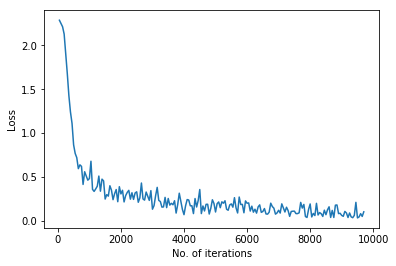

In [11]:
# visulaizing the loss i.e iterations Vs loss
plt.plot(iteration_list,loss_list)
plt.xlabel("No. of iterations")
plt.ylabel("Loss")
plt.show()

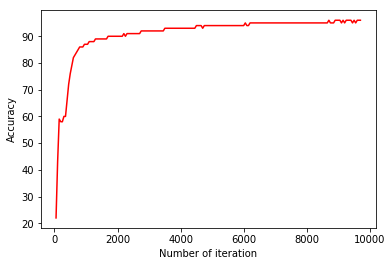

In [12]:
# visulaizing iterations Vs accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.show()
